# ML Testing

Trying to test out Expectation-Maximization (EM) algorithm in Machine Learning (ML).
Only training it on a single image here though. Lots of potential here, needs a lot
more time and effort spend on it though. A supervised algorithm with labels ground truth
images is probably more effective than this. Could definitely spend a whole project on 
this one.

In [1]:
import sys
sys.path.insert(0, "../ellipsefinder/")

import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from methods import *
from preprocess.rmbanner import remove_banner

class Predictor:
    def __init__(self, n=3):
        self.n = n

    def train(self, img):
        self.em = cv2.ml.EM_create()
        self.em.setClustersNumber(self.n)
        self.em.setTermCriteria(( cv2.TERM_CRITERIA_COUNT, 4, 0))
        samples = np.reshape(img, (img.shape[0]*img.shape[1], -1)).astype('float')
        self.em.trainEM(samples)

    def predict(self, img):
        samples = np.reshape(img, (img.shape[0]*img.shape[1], -1)).astype('float')
        labels = np.zeros(samples.shape, 'uint8')
        for i in range(samples.shape[0]):
            retval, probs = self.em.predict2(samples[i])
            labels[i] = retval[1] * (255/self.n) # make it [0,255] for imshow
        return np.reshape(labels, img.shape)

# 1

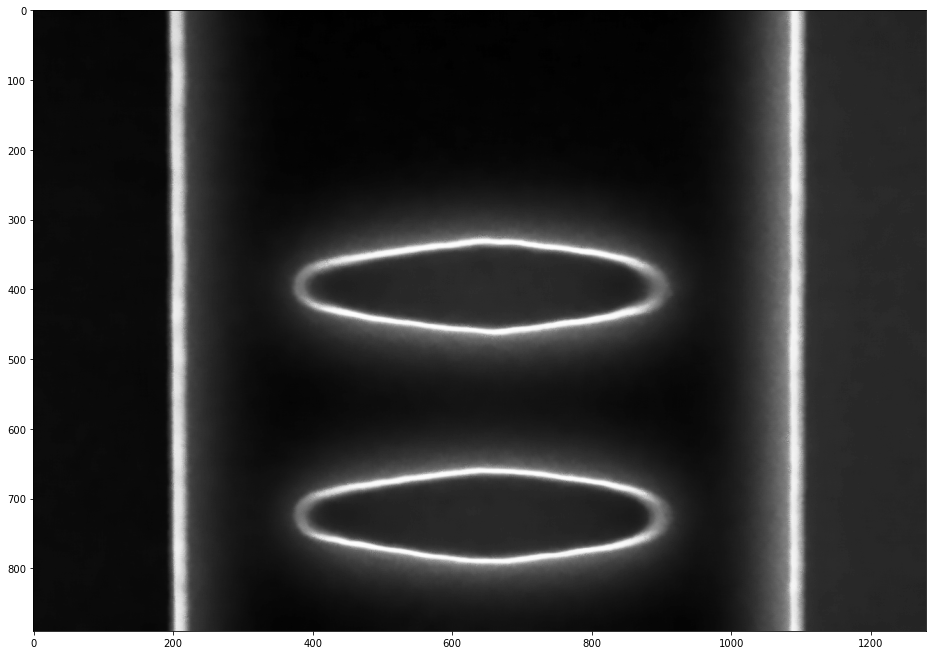

In [2]:
predictor = Predictor(3)

filename = "../images/device1/device_1_q010.jpg"

# Read image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Remove banner
img, loc = remove_banner(img, invert=True, kern=7)

# Denoise image
img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

# Display image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(img, cmap="gray")

In [3]:
# Train model
t = time.perf_counter()
predictor.train( img )
t = time.perf_counter() - t
print ( "train %s s" %t )

train 13.73156879999442 s


In [4]:
# Predict
t = time.perf_counter()
labels = predictor.predict( cv2.fastNlMeansDenoising(cv2.imread(filename, cv2.IMREAD_GRAYSCALE), None, 10, 7, 21) )
t = time.perf_counter() - t
print ( "predict %s s" %t )

predict 3.874182900006417 s


In [5]:
np.unique(labels)

array([  0,  85, 170], dtype=uint8)

In [6]:
tmp = np.zeros_like(labels)
tmp[labels > 0] = 255
tmp

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

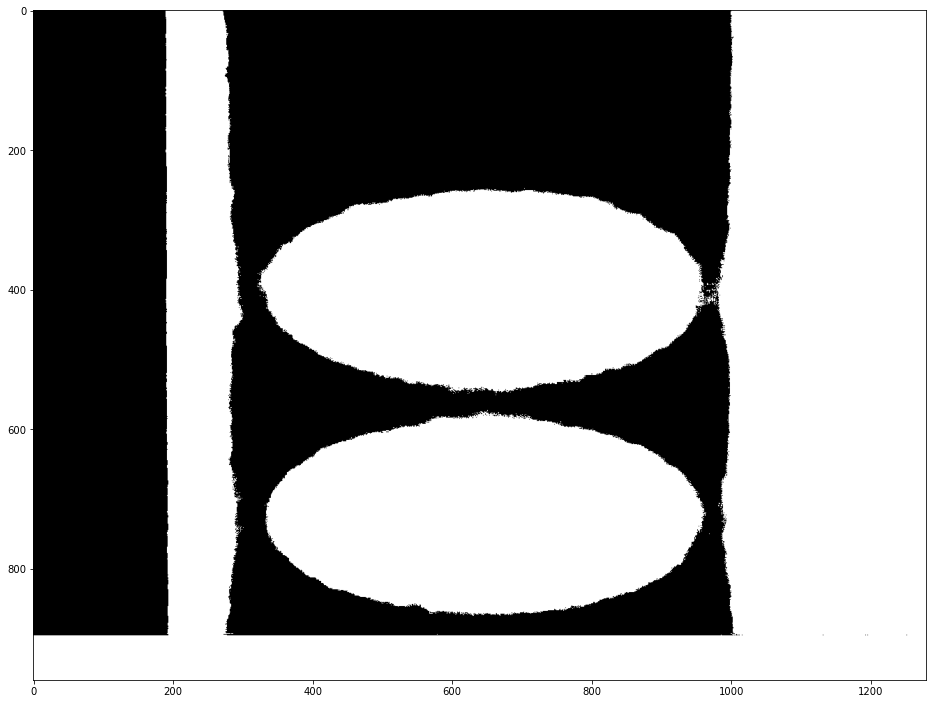

In [7]:
# Display segmented image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(tmp, cmap="gray")

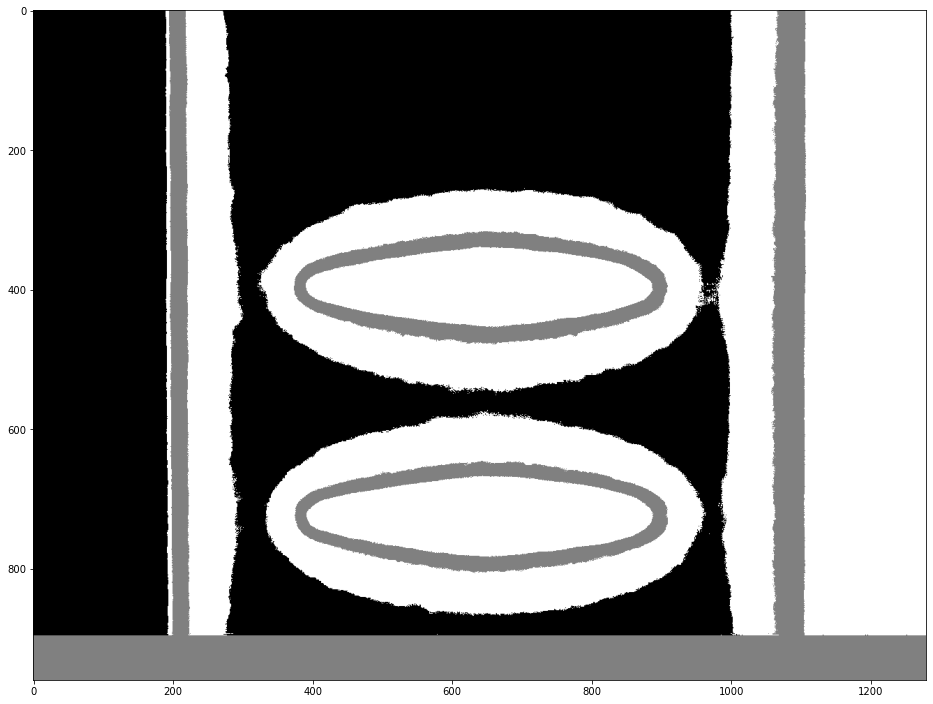

In [8]:
# Display segmented image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(labels, cmap="gray")

In [9]:
# Compare EM segmentation to Basic() thresholding

def save_image(filename: str, img: np.ndarray, suffix: str = "_edited"):
    path = Path(filename)
    name = str(path.parent / path.stem) + suffix + path.suffix
    cv2.imwrite(name, img)

basic = Basic(img)
save_image(filename, basic.preprocess(), "_pre")

In [10]:
save_image(filename, ~tmp, "_ml")

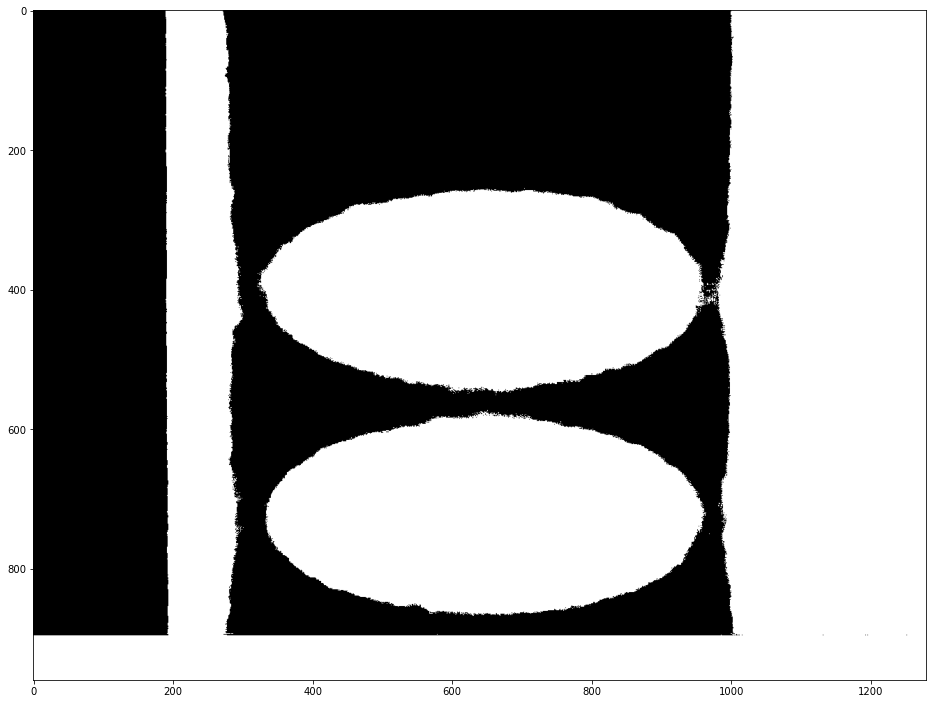

In [11]:
# Display segmented image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(cv2.fastNlMeansDenoising(tmp, None, 10, 7, 21), cmap="gray")

In [ ]:
# Train model
t = time.perf_counter()
predictor.train( img )
t = time.perf_counter() - t
print ( "train %s s" %t )

# 2

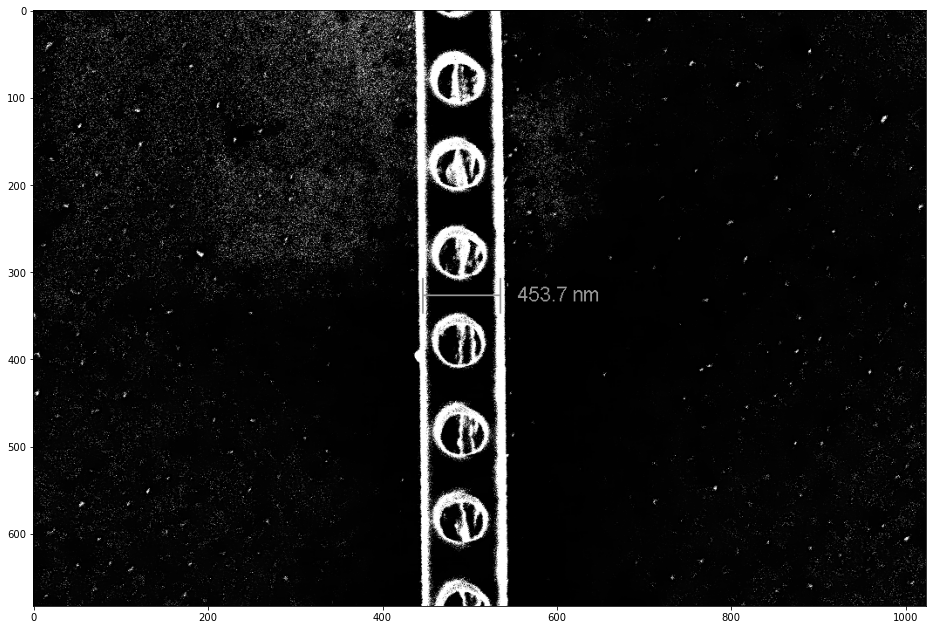

In [13]:
predictor = Predictor(3)

filename = "../images/a90l90-002/a90l90-002.tif"

# Read image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Remove banner
img, loc = remove_banner(img)

# Denoise image
img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
# img = cv2.GaussianBlur(img, (7, 7), 0)

# Display image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(img, cmap="gray")

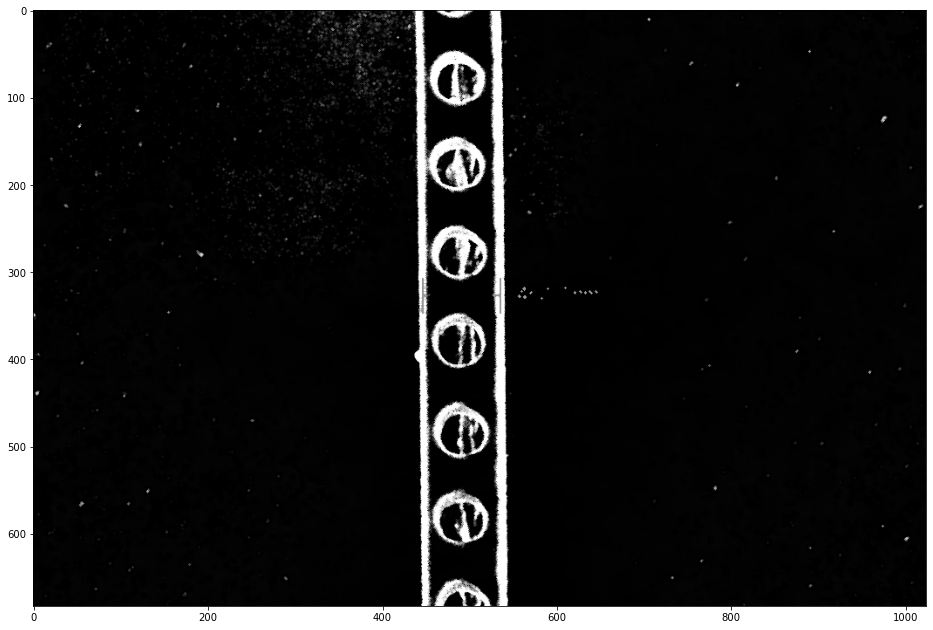

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
tmp = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

# Display image
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(tmp, cmap="gray")

In [19]:
# Train model
t = time.perf_counter()
predictor.train( img )
t = time.perf_counter() - t
print ( "train %s s" %t )

train 14.05889169999864 s
